In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator

In [48]:
data_dir = '../data/'
result_dir = os.path.join(data_dir, 'result')

In [49]:
N_models = 3
Run_No = [1,2,3]

model1 = "Node2vec"
model2 = "GraphConv"
model3 = "RGCN"

models = ["Node2vec", "GraphConv", "RGCN"]

mrr_ADR_drug = pd.DataFrame()
mrr_drug_gene = pd.DataFrame()
mrr_DP_disease = pd.DataFrame()
mrr_disease_gene = pd.DataFrame()

std_mrr_ADR_drug = pd.DataFrame()
std_mrr_drug_gene = pd.DataFrame()
std_mrr_DP_disease = pd.DataFrame()
std_mrr_disease_gene = pd.DataFrame()

prc_ADR_drug = pd.DataFrame()
prc_drug_gene = pd.DataFrame()
prc_DP_disease = pd.DataFrame()
prc_disease_gene = pd.DataFrame()

hits_ADR_drug = pd.DataFrame()
hits_drug_gene = pd.DataFrame()
hits_DP_disease = pd.DataFrame()
hits_disease_gene = pd.DataFrame()

In [50]:
for r in Run_No:

    dir = os.path.join(result_dir, f"adr_drug_M{r}.csv")
    if os.path.exists(dir):
        df_ADR_drug = pd.read_csv(dir)
        ave_df_ave_ADR_drug = df_ADR_drug.mean(axis = 0)
        std_ADR_drug = df_ADR_drug.std(axis = 0)
        
        mrr_ADR_drug = pd.concat([mrr_ADR_drug, round(ave_df_ave_ADR_drug[ave_df_ave_ADR_drug.index == 'mrr'], 3)])
        std_mrr_ADR_drug = pd.concat([std_mrr_ADR_drug, round(std_ADR_drug[std_ADR_drug.index == 'mrr'], 3)])

        prc_ADR_drug = pd.concat([prc_ADR_drug, ave_df_ave_ADR_drug.filter(like='prc@')], axis = 1)
        hits_ADR_drug = pd.concat([hits_ADR_drug, ave_df_ave_ADR_drug.filter(regex='^hits@')], axis = 1)


    dir = os.path.join(result_dir, f"drug_gene_M{r}.csv")
    if os.path.exists(dir):
        df_drug_gene = pd.read_csv(dir)
        ave_df_ave_drug_gene = df_drug_gene.mean(axis = 0)
        std_drug_gene = df_drug_gene.std(axis = 0)
                
        mrr_drug_gene = pd.concat([mrr_drug_gene, round(ave_df_ave_drug_gene[ave_df_ave_drug_gene.index == 'mrr'], 3)])
        std_mrr_drug_gene = pd.concat([std_mrr_drug_gene, round(std_drug_gene[std_drug_gene.index == 'mrr'], 3)])

        prc_drug_gene = pd.concat([prc_drug_gene, ave_df_ave_drug_gene.filter(like='prc@')], axis = 1)
        hits_drug_gene = pd.concat([hits_drug_gene, ave_df_ave_drug_gene.filter(regex='^hits@')], axis = 1)

    
    dir = os.path.join(result_dir, f"dp_disease_M{r}.csv")
    if os.path.exists(dir):
        df_DP_disease = pd.read_csv(dir)
        ave_df_ave_DP_disease = df_DP_disease.mean(axis = 0)
        std_DP_disease = df_DP_disease.std(axis = 0)
        
        mrr_DP_disease = pd.concat([mrr_DP_disease, round(ave_df_ave_DP_disease[ave_df_ave_DP_disease.index == 'mrr'], 3)])
        std_mrr_DP_disease = pd.concat([std_mrr_DP_disease, round(std_DP_disease[std_DP_disease.index == 'mrr'], 3)])

        prc_DP_disease = pd.concat([prc_DP_disease, ave_df_ave_DP_disease.filter(like='prc@')], axis = 1)
        hits_DP_disease = pd.concat([hits_DP_disease, ave_df_ave_DP_disease.filter(regex='^hits@')], axis = 1)

    dir = os.path.join(result_dir, f"gene_disease_M{r}.csv")
    if os.path.exists(dir):
        df_disease_gene = pd.read_csv(dir)
        ave_df_ave_disease_gene = df_disease_gene.mean(axis = 0)
        std_disease_gene = df_disease_gene.std(axis = 0)

        mrr_disease_gene = pd.concat([mrr_disease_gene, round(ave_df_ave_disease_gene[ave_df_ave_disease_gene.index == 'mrr'], 3)])
        std_mrr_disease_gene = pd.concat([std_mrr_disease_gene, round(std_disease_gene[std_disease_gene.index == 'mrr'], 3)])

        prc_disease_gene = pd.concat([prc_disease_gene, ave_df_ave_disease_gene.filter(like='prc@')], axis = 1)
        hits_disease_gene = pd.concat([hits_disease_gene, ave_df_ave_disease_gene.filter(regex='^hits@')], axis = 1)


In [ ]:
prc_ADR_drug.columns = [model1, model2, model3]
prc_drug_gene.columns = [model1, model2, model3]
prc_DP_disease.columns = [model1, model2, model3]
prc_disease_gene.columns = [model1, model2, model3]

hits_ADR_drug.columns = [model1, model2, model3]
hits_drug_gene.columns = [model1, model2, model3]
hits_DP_disease.columns = [model1, model2, model3]
hits_disease_gene.columns = [model1, model2, model3]

In [60]:
hits_ADR_drug = hits_ADR_drug.dropna()
hits_drug_gene = hits_drug_gene.dropna()
hits_DP_disease = hits_DP_disease.dropna()
hits_disease_gene = hits_disease_gene.dropna()

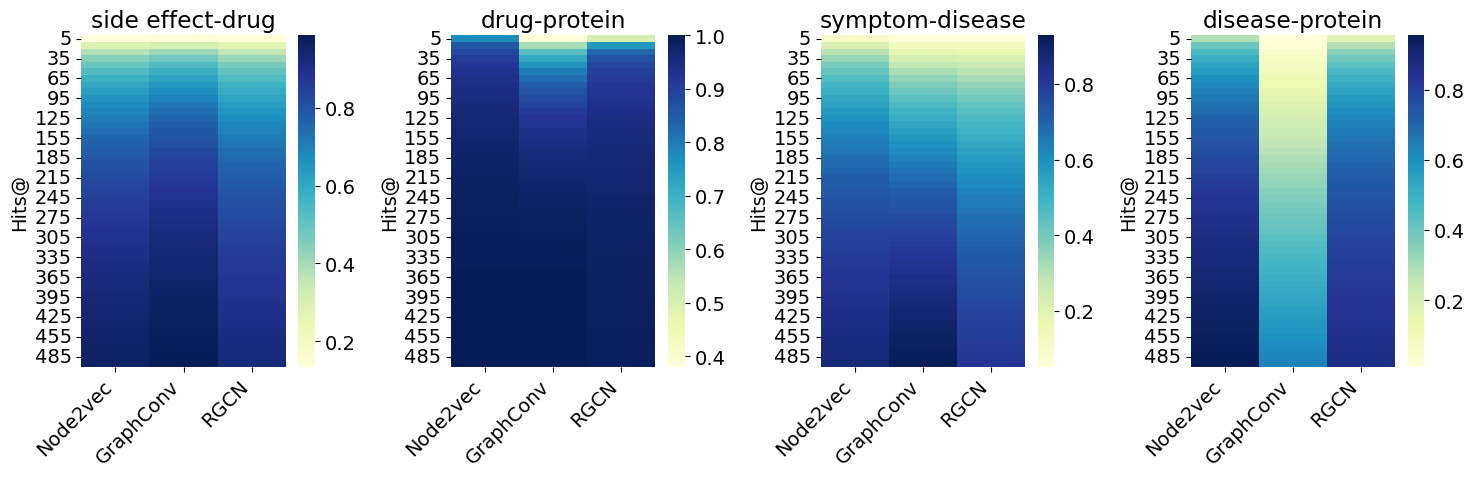

In [61]:
plt.figure(figsize=(15, 5))

# 1) ADR_drug
plt.subplot(1,4,1)
index = hits_ADR_drug.index
hits_ADR_drug.index = hits_ADR_drug.index.str.replace('hits@', '')

sns.heatmap(hits_ADR_drug, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('side effect-drug')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Hits@')

# 2) drug_gene
plt.subplot(1,4,2)
index = hits_drug_gene.index
hits_drug_gene.index = hits_drug_gene.index.str.replace('hits@', '')

sns.heatmap(hits_drug_gene, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0, linecolor="white")

plt.title('drug-protein')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Hits@')

# 3) DP_disease
plt.subplot(1,4,3)
index = hits_DP_disease.index
hits_DP_disease.index = hits_DP_disease.index.str.replace('hits@', '')

sns.heatmap(hits_DP_disease, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('symptom-disease')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Hits@')

# 4) DP_disease
plt.subplot(1,4,4)
index = hits_disease_gene.index
hits_disease_gene.index = hits_disease_gene.index.str.replace('hits@', '')

hits_disease_gene
sns.heatmap(hits_disease_gene, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('disease-protein')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Hits@')

plt.show()

In [62]:
prc_ADR_drug = prc_ADR_drug.dropna()
prc_drug_gene = prc_drug_gene.dropna()
prc_DP_disease = prc_DP_disease.dropna()
prc_disease_gene = prc_disease_gene.dropna()

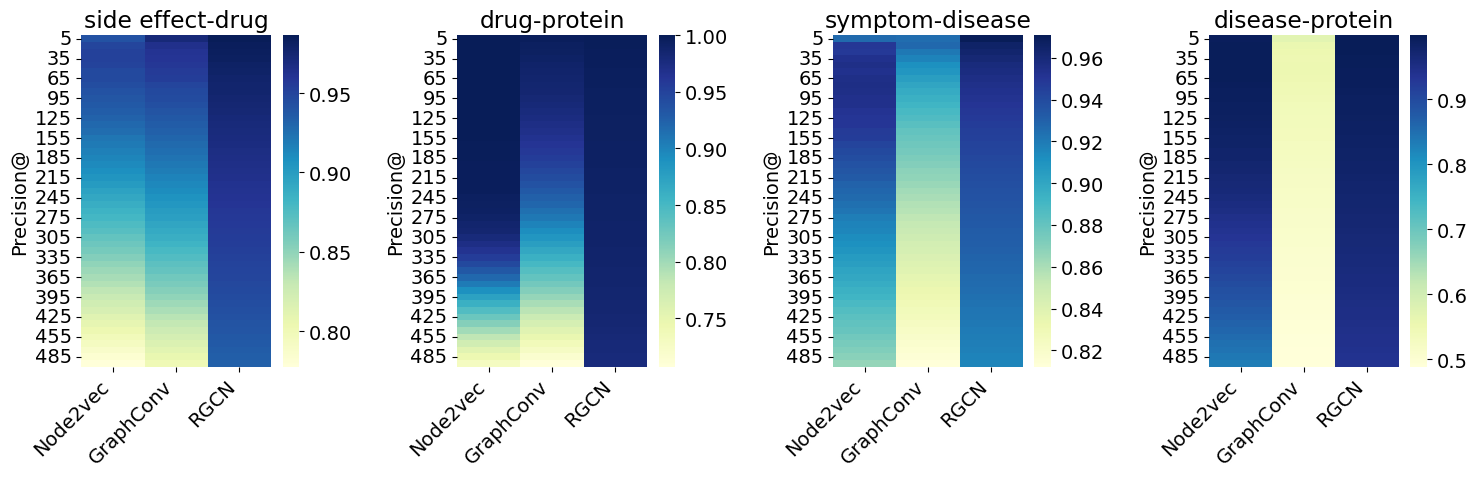

In [63]:
plt.figure(figsize=(15, 5))

# 1) ADR_drug
plt.subplot(1,4,1)
index = prc_ADR_drug.index
prc_ADR_drug.index = prc_ADR_drug.index.str.replace('prc@', '')

sns.heatmap(prc_ADR_drug, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('side effect-drug')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Precision@')

# 2) drug_gene
plt.subplot(1,4,2)
index = prc_drug_gene.index
prc_drug_gene.index = prc_drug_gene.index.str.replace('prc@', '')

sns.heatmap(prc_drug_gene, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('drug-protein')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Precision@')

# 3) DP_disease
plt.subplot(1,4,3)
index = prc_DP_disease.index
prc_DP_disease.index = prc_DP_disease.index.str.replace('prc@', '')

# Create a heatmap
sns.heatmap(prc_DP_disease, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0, linecolor="white")
plt.title('symptom-disease')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Precision@')

# 4) DP_disease
plt.subplot(1,4,4)
index = prc_disease_gene.index
prc_disease_gene.index = prc_disease_gene.index.str.replace('prc@', '')

sns.heatmap(prc_disease_gene, annot=False, cmap="YlGnBu", fmt=".3f", linewidths=0)
plt.title('disease-protein')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Precision@')
plt.show()

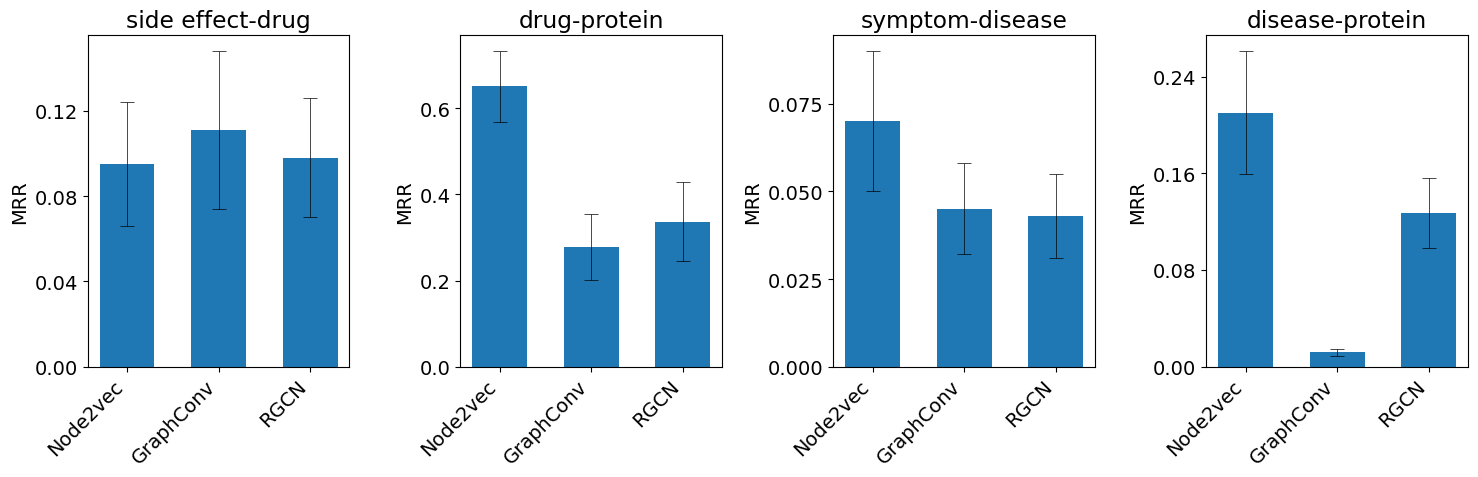

In [68]:
plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 14})

# 1) ADR_drug
plt.subplot(1,4,1)
mrr_ADR_drug.index = models

plt.bar(mrr_ADR_drug.index, mrr_ADR_drug.loc[:,0], width=0.6, 
        yerr=std_mrr_ADR_drug.loc[:,0], capsize=5,
        error_kw={'ecolor': 'black', 'elinewidth': 0.5, 'capthick': 0.5})

plt.title('side effect-drug')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MRR')
plt.gca().yaxis.set_major_locator(MaxNLocator(4))  # Ensure exactly 4 ticks on y-axis


# 2) drug_gene
plt.subplot(1,4,2)
mrr_drug_gene.index = models

plt.bar(mrr_drug_gene.index, mrr_drug_gene.loc[:,0], width=0.6, 
        yerr=std_mrr_drug_gene.loc[:,0], capsize=5,
        error_kw={'ecolor': 'black', 'elinewidth': 0.5, 'capthick': 0.5})

plt.title('drug-protein')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MRR')
plt.gca().yaxis.set_major_locator(MaxNLocator(4))  # Ensure exactly 4 ticks on y-axis

# 3) DP_disease
plt.subplot(1,4,3)
mrr_DP_disease.index = models

plt.bar(mrr_DP_disease.index, mrr_DP_disease.loc[:,0], width=0.6, 
        yerr=std_mrr_DP_disease.loc[:,0], capsize=5,
        error_kw={'ecolor': 'black', 'elinewidth': 0.5, 'capthick': 0.5})

plt.title('symptom-disease')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MRR')
plt.gca().yaxis.set_major_locator(MaxNLocator(4))  # Ensure exactly 4 ticks on y-axis

# 4) DP_disease
plt.subplot(1,4,4)
mrr_disease_gene.index = models

plt.bar(mrr_disease_gene.index, mrr_disease_gene.loc[:,0], width=0.6, 
        yerr=std_mrr_disease_gene.loc[:,0], capsize=5,
       error_kw={'ecolor': 'black', 'elinewidth': 0.5, 'capthick': 0.5})
plt.title('disease-protein')
plt.ylabel('MRR')
plt.gca().yaxis.set_major_locator(MaxNLocator(4))  # Ensure exactly 4 ticks on y-axis

plt.xticks(rotation=45, ha='right')
plt.show()